In [1]:
import os
import csv
import numpy as np

class Result:
    
    def __init__(self, name, age):
        self.name = name
        self.counts = dict()
        self.snp_sums = dict()
        self.age = age
        self.snps = dict()
        
    def set_count(self, kmer_name, count):
        self.counts[kmer_name] = count
        
    def normalized_tel(self):
        return (self.tel_count()/self.counts['CTGGGCGACAGAGCGAGACTCCGTC'])
    
    def tel_count(self):
        return self.counts['TTAGGGTTAGGGTTAGGGTTAGGGT']
        
    def get_label(self):
        return "{}:{}, {}".format(self.name[7:], 
                              int(self.counts['GAGTCAAAAGCAGATACGTGTGTCA']), int(self.counts['GAGTCAAAAGCAGATACATGTGTCA']))
        
    def __str__(self):
        return 'Result {}, age: {}, {} | {}'.format(self.name, self.age, self.tel_count(), self.normalized_tel())
    
    def __repr__(self):
        return 'Result {}, age: {}, {} | {}'.format(self.name, self.age, self.tel_count(), self.normalized_tel())
    
    def get_snp_vals(self):
        result = list()
        for k,s in self.snps.iteritems():
            if s['main']:
                result.append(s['main'])
            else:
                result.append(s['minor'])
        return result
        
    
    def get_input(self):
        output = list()
        output.append(self.normalized_tel())
        #output.append(self.age)
        #output.append(self.age)
        rss = ['rs10936599', 'rs10936601']
        for r in rss:
            if r in self.snps:
                output.append(bool(self.snps[r]['minor']))
        
        #output = output+snps
        return output
    
    def calculate_snps(self):
        with open ('./static/snp_kmers.txt') as f:
            reader = csv.reader(f, delimiter='\t')
            for row in reader:
                name = row[0]
                alt = False
                if name[0:4] == 'ALT_':
                    name = name[4:].split(':')[0]
                    alt = True
                else:
                    name = name.split(':')[0]
                
                if name not in self.snps:
                    self.snps[name] = dict()
                    self.snps[name]['main'] = 0
                    self.snps[name]['minor'] = 0
                    
                count = int(self.counts[row[1].strip()])
                    
                if alt:
                    self.snps[name]['minor'] += count
                else:
                    self.snps[name]['main'] += count
                    

                    
        
        
ages = dict()
with open('./static/SraRunTable.txt') as run_table:
    r = csv.reader(run_table, delimiter='\t')
    r.next()
    for row in r:
        ages[row[8]] = row[11]
        
def get_age(name):
    return int(ages[name])
    

results = list()
for file in os.listdir('./files'):
    name = file[:-4]
    try:
        age = get_age(name)
    except:
        continue
    result = Result(name, age)
    with open('./files/'+file) as f:
        reader = csv.reader(f, delimiter='\t')  
        for row in reader:
            result.set_count(row[0], float(row[1]))
    result.calculate_snps()
    results.append(result)

In [1]:
%matplotlib nbagg

import matplotlib.pyplot as plt

x = list(map(lambda r: r.age, results))
y = list(map(lambda r: r.normalized_tel(), results))
labels = list(map(lambda r: r.get_label(), results))
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

for label, x, y in zip(labels, x,y):
    break
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()
print "y=%.6fx+(%.6f)"%(z[0],z[1])

In [135]:
print "test"

test


In [137]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Embedding, Input, Conv2D,MaxPooling1D, LSTM,SimpleRNN,Reshape
from keras.layers.convolutional import Conv1D
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical,normalize

inputs = list(map(lambda r: r.get_input(), results))
outputs = list(map(lambda r: r.age, results))

inputs = np.array(inputs)
outputs = np.array(outputs)

print inputs[0]
print outputs[0]


model = Sequential()
a = inputs.shape[1]

print inputs[0].shape

#model.add(Embedding(output_dim=128, input_dim=700))
model.add(Dense(inputs[0].shape[0],kernel_initializer="uniform", input_shape=inputs[0].shape, activation = "linear"))
model.add(Dense(150, activation='linear'))
model.add(Dense(150, activation='linear'))
model.add(Dense(1, activation='linear')) 


model.compile(loss='mse',
              optimizer='rmsprop')

history = model.fit(inputs, outputs, epochs=100,  batch_size=32, validation_split=0.1, verbose=0)
print "OK!"

[ 7.96639283  0.          1.        ]
56
(3,)
OK!


[55.769330970136636]
[76.891921997070312]
[[ 8.20886616  0.          0.        ]
 [ 5.99729181  0.          0.        ]
 [ 6.68263342  1.          0.        ]
 [ 5.87083514  0.          0.        ]
 [ 5.42470945  0.          0.        ]
 [ 6.50398301  0.          0.        ]
 [ 5.37827779  1.          1.        ]
 [ 6.05921053  0.          0.        ]
 [ 5.52675654  1.          0.        ]
 [ 6.50860975  1.          0.        ]
 [ 6.02988623  0.          1.        ]
 [ 6.29055565  0.          0.        ]
 [ 7.06495413  1.          1.        ]
 [ 3.95090203  0.          0.        ]
 [ 5.66863012  1.          0.        ]
 [ 2.52171471  0.          0.        ]
 [ 6.351992    0.          1.        ]
 [ 6.02826802  0.          0.        ]
 [ 5.37609599  0.          1.        ]
 [ 7.37058948  0.          0.        ]
 [ 6.66246004  0.          0.        ]
 [ 7.25625745  0.          1.        ]
 [ 7.81120728  0.          1.        ]
 [ 5.32819887  0.          1.        ]
 [ 7.68293446  1.     

<IPython.core.display.Javascript object>


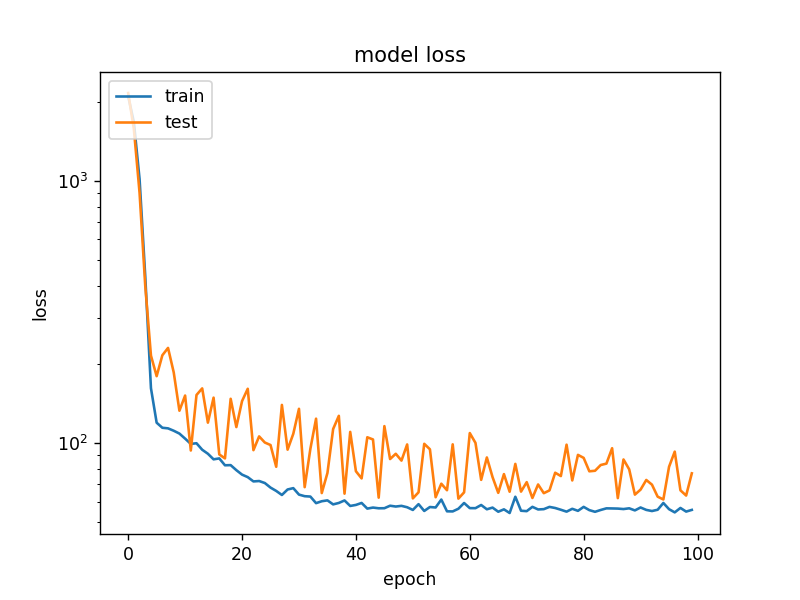

In [138]:
%matplotlib nbagg

print history.history['loss'][-1:]
print history.history['val_loss'][-1:]

print inputs[-25:]

print model.predict(inputs[-25:])
print outputs[-25:]

plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()